Simulation Demonstration
=====================

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import soepy

In this notebook we present descriptive statistics of a series of simulated samples with the soepy toy model.

soepy is closely aligned to the model in Blundell et. al. (2016). Yet, we wish to use the soepy package for estimation based on the German SOEP. In this simulation demonstration, some parameter values are partially set close to the parameters estimated in the seminal paper of Blundell et. al. (2016). The remainder of the parameter values are altered such that simulated wage levels and employment choice probabilities (roughly) match the statistics observed in the SOEP Data. 
- the constants in the wage process gamma_0 equal are set to ensure alignment with SOEP data.
- the returns to experience in the wage process gamma_1 are set close to the coefficient values on gamma0, Blundell Table VIII, p. 1733
- the part-time experience accumulation parameter is set close to the coefficient on g(P), Blundell Table VIII, p. 1733,
- the experience depreciation parameter delta is set close to the coefffient values on delta, Blundell Table VIII, p. 1733,
- the disutility of part-time work parameter theta_p is set to ensure alignment with SOEP data,
- the disutility of full-time work parameter theta_f is set to ensure alignment with SOEP data.

To ensure that some individuals also choose to be non-emplyed, we set the period wage for nonemployed to be equal to some fixed value, constant over all periods. We call this income in unemployment "benefits".

In [6]:
data_frame_baseline = soepy.simulate('toy_model_init_file_01_1000.yml')

In [7]:
data_frame_baseline.head(20)

,Identifier,Period,Years of Education,Choice,Systematic Wage,Period Wage N,Period Wage P,Period Wage F,Consumption Utility N,Consumption Utility P,Consumption Utility F,Flow Utility N,Flow Utility P,Flow Utility F
0,0,0,10,2.0,6.855149,6.0,8.188784,15.014135,-0.654707,-0.109008,-0.051085,-0.654707,-0.728813,-0.586686
1,0,1,10,0.0,7.423946,6.0,8.725563,5.065398,-0.654707,-0.105200,-0.093875,-0.654707,-0.703355,-1.078108
2,0,2,10,0.0,7.423946,6.0,5.689242,8.746799,-0.654707,-0.133668,-0.069135,-0.654707,-0.893693,-0.793982
3,0,3,10,0.0,7.423946,6.0,8.349554,4.796164,-0.654707,-0.107827,-0.096790,-0.654707,-0.720921,-1.111592
4,0,4,10,0.0,7.423946,6.0,7.107834,4.972434,-0.654707,-0.118001,-0.094854,-0.654707,-0.788944,-1.089350
5,0,5,10,2.0,7.423946,6.0,8.181864,16.784272,-0.654707,-0.109059,-0.047994,-0.654707,-0.729158,-0.551189
6,0,6,10,1.0,7.787468,6.0,11.461648,11.878650,-0.654707,-0.090299,-0.058246,-0.654707,-0.603727,-0.668923
7,0,7,10,0.0,7.841832,6.0,7.258882,8.760159,-0.654707,-0.116620,-0.069076,-0.654707,-0.779708,-0.793303
8,0,8,10,0.0,7.841832,6.0,7.081287,5.600789,-0.654707,-0.118249,-0.088739,-0.654707,-0.790599,-1.019123
9,0,9,10,0.0,7.841832,6.0,7.440079,5.851004,-0.654707,-0.115021,-0.086593,-0.654707,-0.769016,-0.994482


In [19]:
#Determine the observed wage given period choice
def get_observed_wage (row):
    if row['Choice'] == 2:
        return row['Period Wage F']
    elif row['Choice'] ==1:
        return row['Period Wage P']
    elif row['Choice'] ==0:
        return row['Period Wage N']
    else:
        return np.nan

# Add to data frame
data_frame_baseline['Wage Observed'] = data_frame_baseline.apply(
    lambda row: get_observed_wage (row),axis=1
)

# Determine the education level
def get_educ_level(row):
    if row["Years of Education"] >= 10 and row["Years of Education"] < 12:
        return 0
    elif row["Years of Education"] >= 12 and row["Years of Education"] < 16:
        return 1
    elif row["Years of Education"] >= 16:
        return 2
    else:
        return np.nan

data_frame_baseline["Educ Level"] = data_frame_baseline.apply(
    lambda row: get_educ_level(row), axis=1
)

Descriptive statistics to look at:
- average part-time, full-time and nonemployment rate - ideally close to population rates
- frequency of each choice per period - ideally more often part-time in early periods, more full-time in later periods
- frequency of each choice over all periods for individuals with different levels of education - ideally, lower educated more often unemployed and in part-time jobs
- average period wages over all individuals - series for all periods
- average period individuals over all individuals - series for all periods

2.0    0.359476
0.0    0.333541
1.0    0.306983
Name: Choice, dtype: float64

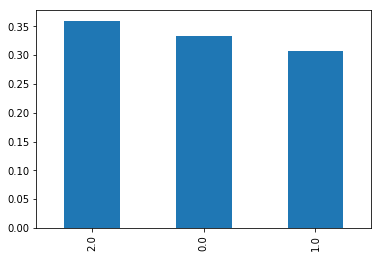

In [8]:
# Average non-employment, part-time, and full-time rates over all periods and individuals
data_frame_baseline['Choice'].value_counts(normalize=True).plot(kind = 'bar')
data_frame_baseline['Choice'].value_counts(normalize=True)

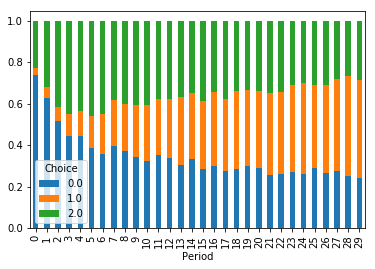

In [9]:
# Average non-employment, part-time, and full-time rates per period
data_frame_baseline.groupby(['Period'])['Choice'].value_counts(normalize=True).unstack().plot(kind = 'bar', stacked = True)

As far as the evolution of choices over all agents and periods is concerned, we first observe a declining tendency of individuals to be unemployed as desired in a perfectly calibrated simulation. Second, individuals in our  simulation tend to choose full-time and non-employment less often in the later periods of the model. Rates of part-time employment increase for the same period. 

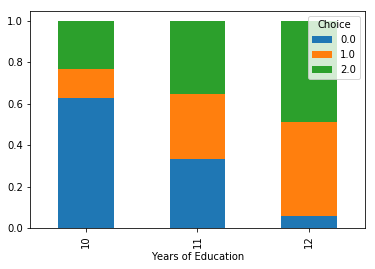

In [10]:
# Average non-employment, part-time, and full-time rates for individuals with different level of education
data_frame_baseline.groupby(['Years of Education'])['Choice'].value_counts(normalize=True).unstack().plot(kind = 'bar', stacked = True)

As should be expected, the higher the education level of the individuals the lower the observed.

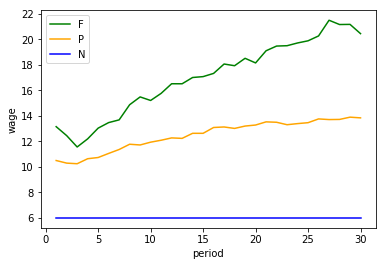

In [14]:
# Average wage for each period and choice
fig,ax = plt.subplots()

# Generate x axes values
period = np.arange(1,31)

# Generate plot lines
ax.plot(period,
        data_frame_baseline[data_frame_baseline['Choice'] == 2].groupby(['Period'])['Period Wage F'].mean(),
        color='green', label = 'F')
ax.plot(period,
        data_frame_baseline[data_frame_baseline['Choice'] == 1].groupby(['Period'])['Period Wage P'].mean(),
        color='orange', label = 'P')
ax.plot(period,
        data_frame_baseline[data_frame_baseline['Choice'] == 0].groupby(['Period'])['Period Wage N'].mean(), 
        color='blue', label = 'N')

# Plot settings
ax.set_xlabel("period")
ax.set_ylabel("wage")
ax.legend(loc='best')

The period wage of non-employment actually refers to the unemployment benefits individuals receive. The amount of the benefits is constant over time. Part-time and full-time wages rise as individuals gather more experience.

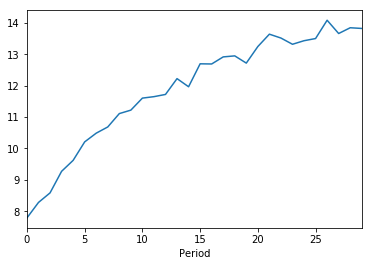

In [20]:
# Average wages by period
data_frame_baseline.groupby(['Period'])['Wage Observed'].mean().plot()

Comparative Statics
------------------------

In the following, we discuss some comparative statics of the model.

While changing other parameter values we wish to assume that the parameters central to the part-time penalty phenomenon studied in Blundell (2016) stay the same as in the benchmark specification:
- part-time experience accumulation g_s1,2,3
- experience depreciation delta

Comparative statics:

Parameters in the systematic wage govern the choice between employment (either part-time, or full-time) and nonemployment. They do not determine the choice between part-time and full-time employment since the systematic wage is equal for both options.
- constnat in wage process gamma_0: lower/higher value of the coefficient implies that other components such as accumulated work experience and the productivity shock are relatively more/less important in determining the choice between employment and nonemployment. Decreasing the constant for individuals of a certain education level, e.g., low, results in these individuals choosing nonemployment more often.
- return to experience gamma_1: lower value of the coefficient implies that accumulated work experience is less relevant in determining the wage in comparison to other factors such as the constant or the productivity shock. Higher coefficients should lead to agents persistently choosing employment versus non-employment.

The productivity shock:
- productivity shock variances - the higher the variances, the more switching between occupational alternatives.

Risk aversion:
- risk aversion parameter mu: the more negative the risk aversion parameter, the more eager are agents to ensure themselves against productivity shoks through accumulation of experience. Therefore, lower values of the parameter are associated with higher rates of full-time employment.

The labor disutility parameters directly influence:
- benefits - for higher benefits individuals of all education levels would choose non-employment more often
- labor disutility for part-time theta_p - for a higher coefficient, individuals of all education levels would choose to work part-time more often
- labor disutility for full-time theta_f - for a higher coefficient, individuals of all education levels would choose to work part-time more often

Finally, we illustrate one of the changes discussed above. In the alternative specifications the return to experience coefficient gamma_1 for the individuals with medium level of educations is increased from 0.157 to 0.195. As a result, experience accumulation matters more in the utility maximization. Therefore, individuals with medium level of education choose to be employed more often. Consequently, also aggregate levels of nonemployment are lower in the model.

In [23]:
data_frame_alternative = soepy.simulate('toy_model_init_file_01_1000.yml')

In [24]:
# Average non-employment, part-time, and full-time rates for individuals with different level of education
[data_frame_alternative.groupby(['Years of Education'])['Choice'].value_counts(normalize=True),
data_frame_baseline.groupby(['Years of Education'])['Choice'].value_counts(normalize=True)]

[Years of Education  Choice
 10                  0.0       0.626646
                     2.0       0.231452
                     1.0       0.141902
 11                  2.0       0.414986
                     1.0       0.396769
                     0.0       0.188245
 12                  2.0       0.486226
                     1.0       0.456710
                     0.0       0.057064
 Name: Choice, dtype: float64, Years of Education  Choice
 10                  0.0       0.625914
                     2.0       0.231661
                     1.0       0.142424
 11                  2.0       0.352418
                     0.0       0.334851
                     1.0       0.312730
 12                  2.0       0.486226
                     1.0       0.456710
                     0.0       0.057064
 Name: Choice, dtype: float64]

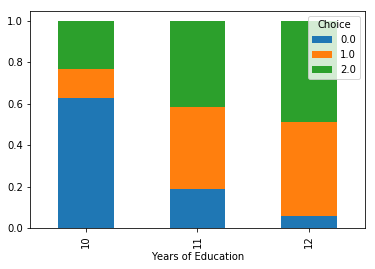

In [25]:
# Average non-employment, part-time, and full-time rates for individuals with different level of education
data_frame_alternative.groupby(['Years of Education'])['Choice'].value_counts(normalize=True).unstack().plot(kind = 'bar', stacked = True)

2.0    0.379334
1.0    0.333575
0.0    0.287091
Name: Choice, dtype: float64

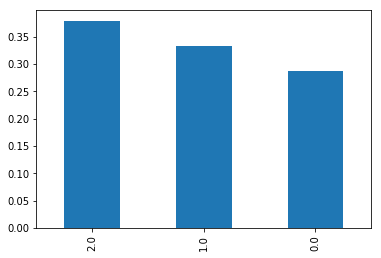

In [26]:
# Average non-employment, part-time, and full-time rates over all periods and individuals
data_frame_alternative['Choice'].value_counts(normalize=True).plot(kind = 'bar')
data_frame_alternative['Choice'].value_counts(normalize=True)